### Sentiment Analysis on Climate_twitter Dataset <br> Machine Learning Models <br> Logistic Regression, Decision Tree, Random Forest, Support Vector Machine, Naive Bayes

#### Importing Modules and Loading in Dataset

In [1]:
import pandas as pd    
import numpy as np
df = pd.read_csv('Climate_twitter.csv')

In [2]:
df.head()

,id,date,retweets,source,author,likes,text,twitter_name,location,verified,followers,friends,polarity,subjectivity
0,2184934963,2020-12-22 23:22:20,71,Twitter Web App,GO GREEN,91,The death of summer Arctic ice our Earth coole...,ECOWARRIORSS,NaN,False,23415,20439,-0.054365,0.426984
1,508658626,2020-12-10 14:30:00,14,Twitter for Advertisers,Elsevier Energy,98,Elsevier and the EditorsinChief are pleased to...,ElsevierEnergy,"Oxford, England",False,6615,508,0.387500,0.633333
2,2607105006,2020-12-22 21:28:52,0,Twitter Web App,Arwyn Thomas,1,From better climate change education to improv...,siwarr5,Carmarthen,False,22,133,0.261905,0.345238
3,19609660,2020-12-22 21:24:10,0,Twitter Web App,"Tom Gillispie, EDITOR/WRITER",0,climate change Links to FIXING CLIMATE CHANGE ...,EDITORatWORK,"Rural Hall, North Carolina, USA",False,4191,3708,0.000000,0.000000
4,19609660,2020-12-21 22:52:09,1,Twitter Web App,"Tom Gillispie, EDITOR/WRITER",1,climate change The 11TH HOUR FOR THE EARTH cli...,EDITORatWORK,"Rural Hall, North Carolina, USA",False,4191,3708,0.000000,0.000000


#### Formatting Dataset for Sentiment Analysis

In [3]:
df = df.drop(columns=['id','date','source','author','twitter_name','location','verified','retweets','likes','followers','friends'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396 entries, 0 to 395
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   text          396 non-null    object 
 1   polarity      396 non-null    float64
 2   subjectivity  396 non-null    float64
dtypes: float64(2), object(1)
memory usage: 9.4+ KB


In [4]:
conditions = [
    (df['polarity'] <= -0.05),
    (df['polarity'] > -0.05) & (df['polarity'] < 0.05),
    (df['polarity'] >= 0.05)]

values = [-1,0,1]

df['Label'] = np.select(conditions, values)

df.head()

,text,polarity,subjectivity,Label
0,The death of summer Arctic ice our Earth coole...,-0.054365,0.426984,-1
1,Elsevier and the EditorsinChief are pleased to...,0.387500,0.633333,1
2,From better climate change education to improv...,0.261905,0.345238,1
3,climate change Links to FIXING CLIMATE CHANGE ...,0.000000,0.000000,0
4,climate change The 11TH HOUR FOR THE EARTH cli...,0.000000,0.000000,0


In [5]:
df.info()
# convert text column to string for easier processing
df['text'] = df['text'].astype("string")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396 entries, 0 to 395
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   text          396 non-null    object 
 1   polarity      396 non-null    float64
 2   subjectivity  396 non-null    float64
 3   Label         396 non-null    int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 12.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396 entries, 0 to 395
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   text          396 non-null    string 
 1   polarity      396 non-null    float64
 2   subjectivity  396 non-null    float64
 3   Label         396 non-null    int64  
dtypes: float64(2), int64(1), string(1)
memory usage: 12.5 KB


#### Logistic Regression

In [6]:
x=df.text.values

In [7]:
y=df.Label.values

In [8]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=.2, random_state=42)

#### Vectorizing

In [9]:
from sklearn.feature_extraction.text import CountVectorizer
vec=CountVectorizer()
vec.fit(x_train)
X_train=vec.transform(x_train)
X_test=vec.transform(x_test)

In [10]:
print(f"Before vectorizing {x_train[0]}. After vectorizing {X_train[0]}")

Before vectorizing Nobody making money from fossil fuels is doing anything climate change global warming. After vectorizing   (0, 229)	1
  (0, 471)	1
  (0, 521)	1
  (0, 801)	1
  (0, 1053)	1
  (0, 1072)	1
  (0, 1078)	1
  (0, 1121)	1
  (0, 1362)	1
  (0, 1521)	1
  (0, 1610)	1
  (0, 1679)	1
  (0, 2555)	1


In [11]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression(max_iter=1000)
classifier.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [12]:
y_pred=classifier.predict(X_test)

In [13]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

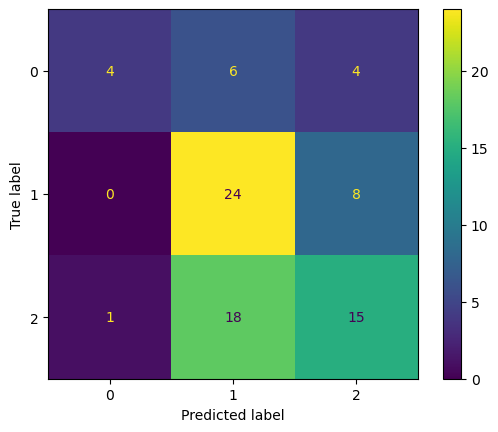

In [14]:
disp.plot()

In [15]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          -1       0.80      0.29      0.42        14
           0       0.50      0.75      0.60        32
           1       0.56      0.44      0.49        34

    accuracy                           0.54        80
   macro avg       0.62      0.49      0.50        80
weighted avg       0.58      0.54      0.52        80



#### Decision Tree

In [16]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

DecisionTreeClassifier()

In [17]:
y_pred = dtc.predict(X_test)
y_pred

array([-1, -1,  1,  0,  0, -1,  0, -1,  0,  0, -1,  0, -1,  0,  1,  0,  0,
        0,  1,  1,  1, -1, -1,  1,  1, -1, -1,  1, -1,  1,  0,  0,  0, -1,
        1,  1,  1,  0,  0,  1,  0,  0,  1,  1,  0,  0, -1,  0,  1,  1,  1,
        1,  0,  1, -1,  1,  1,  0,  1,  0,  1,  0,  1,  0,  0,  1, -1, -1,
       -1, -1, -1,  0,  0,  1, -1,  1,  0,  0,  1, -1])

In [18]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

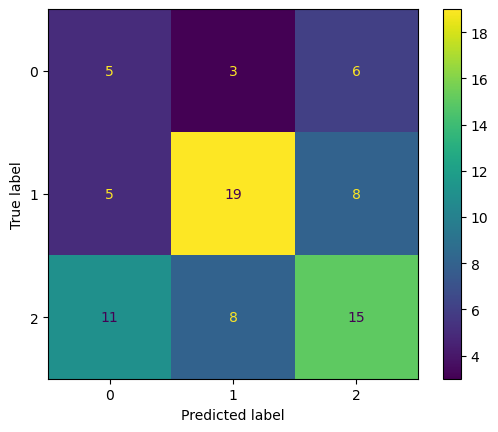

In [19]:
disp.plot()

In [20]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          -1       0.24      0.36      0.29        14
           0       0.63      0.59      0.61        32
           1       0.52      0.44      0.48        34

    accuracy                           0.49        80
   macro avg       0.46      0.46      0.46        80
weighted avg       0.51      0.49      0.50        80



#### Random Forest

In [21]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)

In [22]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

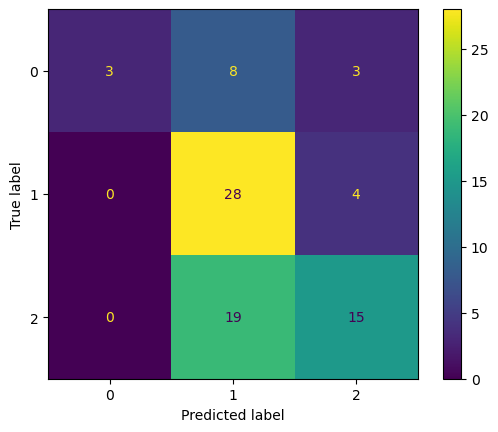

In [23]:
disp.plot()

In [24]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          -1       1.00      0.21      0.35        14
           0       0.51      0.88      0.64        32
           1       0.68      0.44      0.54        34

    accuracy                           0.57        80
   macro avg       0.73      0.51      0.51        80
weighted avg       0.67      0.57      0.55        80



#### Support Vector Machine

In [25]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)

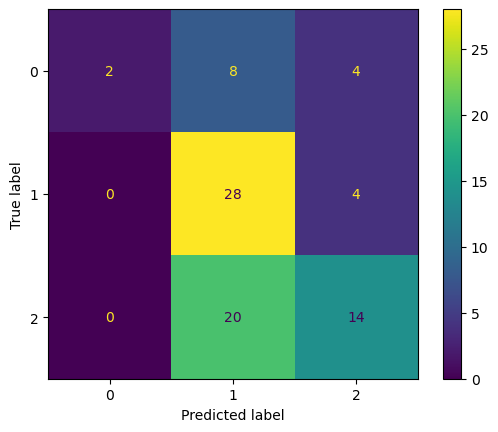

In [26]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [27]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

          -1       1.00      0.14      0.25        14
           0       0.50      0.88      0.64        32
           1       0.64      0.41      0.50        34

    accuracy                           0.55        80
   macro avg       0.71      0.48      0.46        80
weighted avg       0.65      0.55      0.51        80



#### K-Nearest Neighbor

In [28]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

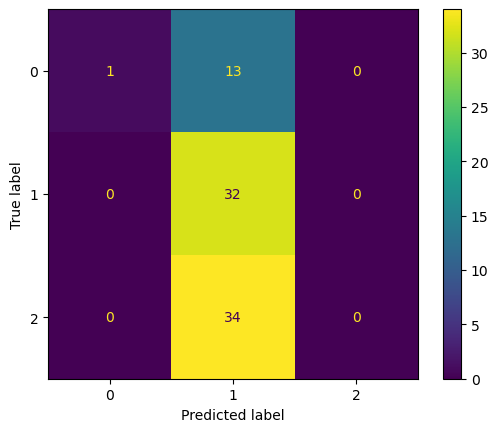

In [29]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [30]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

          -1       1.00      0.07      0.13        14
           0       0.41      1.00      0.58        32
           1       0.00      0.00      0.00        34

    accuracy                           0.41        80
   macro avg       0.47      0.36      0.24        80
weighted avg       0.34      0.41      0.25        80



/Users/tessanderson/anaconda3/envs/thesiswork/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/tessanderson/anaconda3/envs/thesiswork/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/tessanderson/anaconda3/envs/thesiswork/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(av

#### Naive Bayes

In [31]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
X_trainA = X_train.toarray()
X_testA = X_test.toarray()
gnb.fit(X_trainA, y_train)
y_pred = gnb.predict(X_testA)

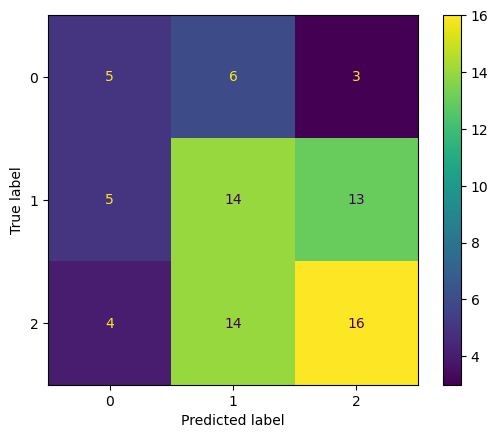

In [32]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [33]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

          -1       0.36      0.36      0.36        14
           0       0.41      0.44      0.42        32
           1       0.50      0.47      0.48        34

    accuracy                           0.44        80
   macro avg       0.42      0.42      0.42        80
weighted avg       0.44      0.44      0.44        80



#### Machine Learning Model Pipeline

In [50]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

X = df.text.values
y = df.Label.values

# y = preprocessing.label_binarize(y, classes=[-1, 0, 1])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

from sklearn.feature_extraction.text import CountVectorizer
vec=CountVectorizer()
vec.fit(X_train)
X_train=vec.transform(X_train)
X_test=vec.transform(X_test)

In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

model_pipeline = []
model_pipeline.append(LogisticRegression())
model_pipeline.append(SVC())
model_pipeline.append(KNeighborsClassifier())
model_pipeline.append(DecisionTreeClassifier())
model_pipeline.append(RandomForestClassifier())

gauss_add = []
gauss_add.append(GaussianNB())

In [52]:
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [56]:
model_list = ['Logistic Regression', 'SVM', 'KNN', 'Decision Tree', 'Random Forest','Naive Bayes'] 
acc_list = []
auc_list = []
cm_list = []

for model in model_pipeline:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc_list.append(metrics.accuracy_score(y_test, y_pred))
    #fpr, tpr, _thresholds = metrics.roc_curve(y_test, y_pred)
    #auc_list.append(round(metrics.auc(fpr, tpr),2))
    cm_list.append(confusion_matrix(y_test, y_pred))

for model in gauss_add:
    model.fit(X_trainA, y_train)
    y_pred = model.predict(X_testA)
    acc_list.append(metrics.accuracy_score(y_test, y_pred))
    #fpr, tpr, _thresholds = metrics.roc_curve(y_test, y_pred)
    #auc_list.append(round(metrics.auc(fpr, tpr),2))
    cm_list.append(confusion_matrix(y_test, y_pred))


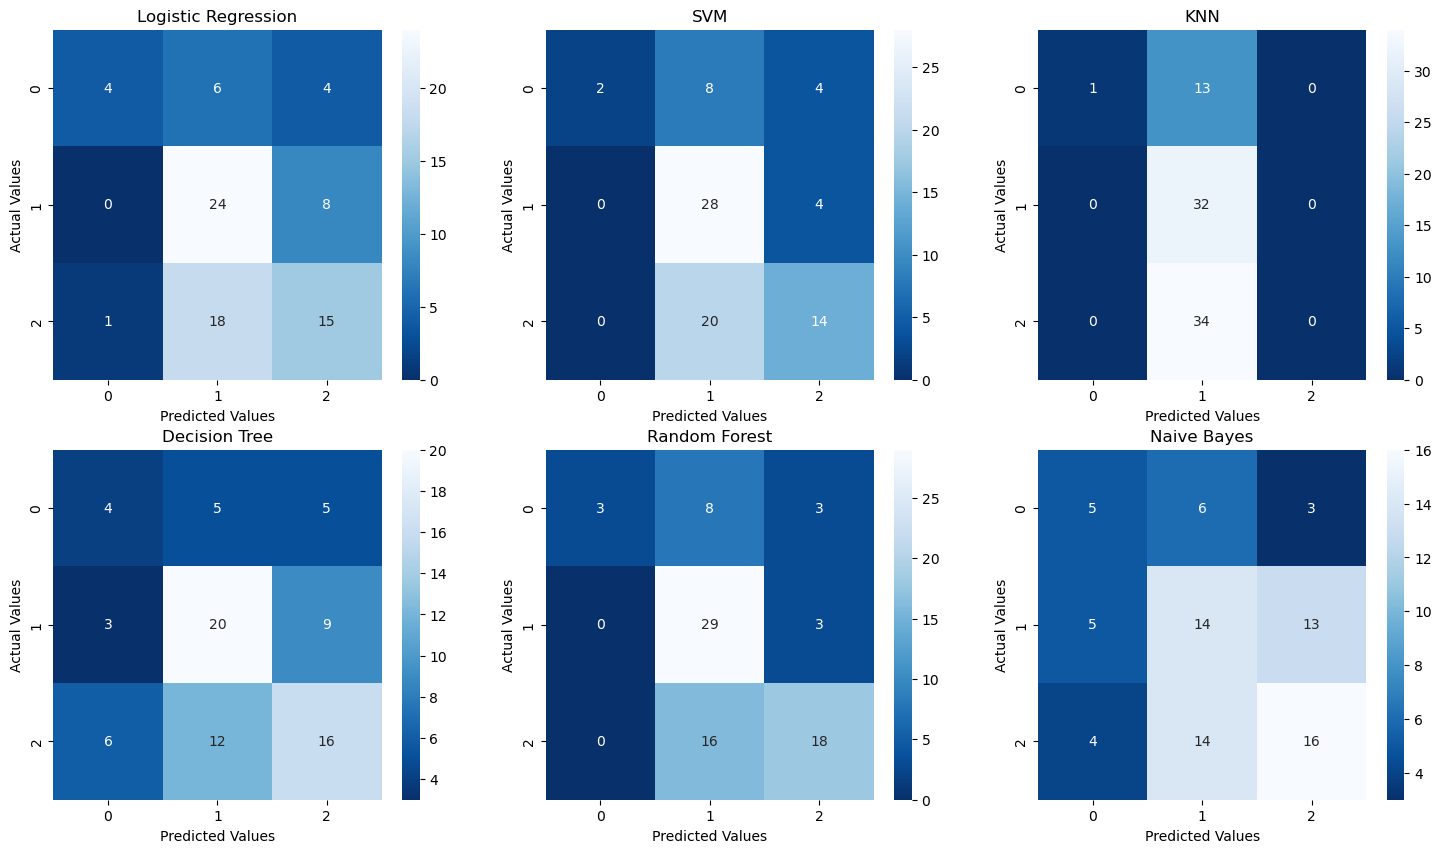

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

fig = plt.figure(figsize = (18,10))
for i in range(len(cm_list)):
    cm = cm_list[i]
    model = model_list[i]
    sub = fig.add_subplot(2, 3, i+1).set_title(model)
    cm_plot = sns.heatmap(cm, annot=True, cmap = 'Blues_r', fmt='g')
    cm_plot.set_xlabel("Predicted Values")
    cm_plot.set_ylabel("Actual Values")

In [60]:
result_df = pd.DataFrame({'Model':model_list, 'Accuracy':acc_list}) # , 'AUC':auc_list
result_df
result_df.to_csv('Climate_twitter_results.csv')